# Generalization, Underfitting, and Overfitting
________
## Model Complexity in KNN Clasifier
Data : bankloan.csv
- Apply KNN Clasifier
    - Target : Default
    - Features : employ, debtinc, creddebt, othdebt
- Using different k(1, 3, 5, 7, ..., 100): Apply scaling and validate the model using accuracy in 80% training data and 20% testing data
- Compare accuracies obtained from training data and testing data
   
      
> ### Data and Library

In [1]:
# dataframe
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

# pre-processing and splitting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

# metrics and performance measurement
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\What is Classification_\bankloan.csv')
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
x = bank[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = bank['default']

> ### Data Splitting
data : 0 = 90%, 1 = 10%    
train (80) : 0 = 90%, 1 = 10%   
test (80) : 0 = 90%, 1 = 10%   

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2020, stratify = y)

> ### Scaling
measurement accuracy more valid

In [5]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

> ### Generalization Performance

In [6]:
k = range(1, 100, 2) # 1 3 5 7 .... 99
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    # Fitting Model
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)
    
    # Test Accuracies
    y_pred_train = knn.predict(x_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracies.append(acc_train)
    
    # Train Accuracies
    y_pred_test = knn.predict(x_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_test)
    
    # Choose best k
    if score < acc_test:
        score = acc_test
        best_k = i

In [7]:
print('Best k factor :', best_k)
print('Score :', score*100)

Best k factor : 31
Score : 82.85714285714286


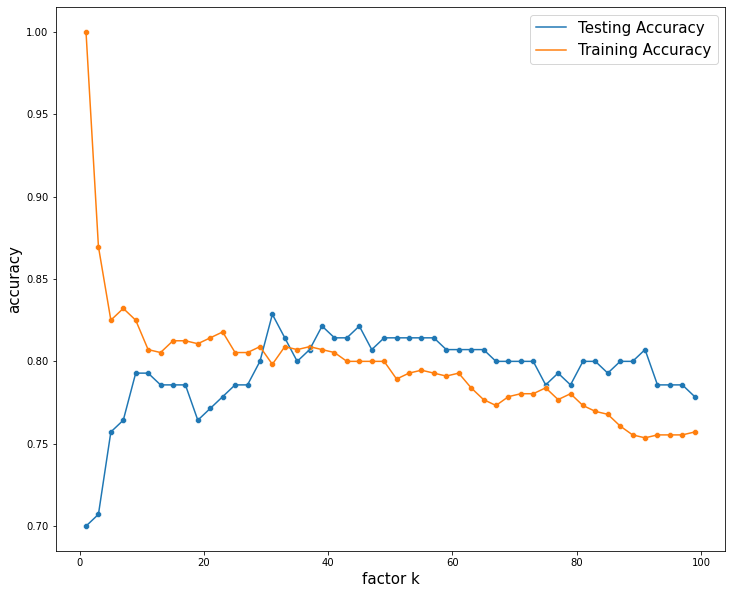

In [8]:
plt.figure(figsize = (12,10))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['Testing Accuracy', 'Training Accuracy'], fontsize=15)
plt.xlabel('factor k', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.show()


1. Best k factor, k = 31 with accuracy 82.5 %
2. k = 1 : score train 100% & score test 70%. Which means k = 1 have very bad accuracy in test dataset
3. For k below 31, the ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting
________________
## Model Complexity in Decision Tree
Data : bankloan.csv
How :
- Apply decision tree clasification method (max_depth = 2)
    - target : default
    - features : employ, debtinc, creddebt, othdebt
- Using different maximum depth of the tree (1, 2, 3, ..., 25) : Validate the model using 80% training data and 20% in test data
- Compare accuracies obtained from training data and testing data
- Try another hyperparameter such as minimum samples split, minimum samples leaf, etc
- Check the tree: is there any difference whether we applied scaling or not?

> ### Data and Library

In [9]:
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [10]:
from sklearn.tree import DecisionTreeClassifier

> ### Generalization Performance

In [11]:
# Using max_depth

depth = range(1, 26) # 1 3 5 7 .... 99
testing_accuracies = []
training_accuracies = []
score = 0

for i in depth:
    # Fitting Model
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(x_train, y_train)
    
    # Test Accuracies
    y_pred_train = tree.predict(x_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracies.append(acc_train)
    
    # Train Accuracies
    y_pred_test = tree.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_test)
    
    # Choose best depth
    if score < acc_test:
        score = acc_test
        best_depth = i

In [12]:
print('Best depth :', best_depth)
print('Score :', score*100)

Best depth : 8
Score : 78.57142857142857


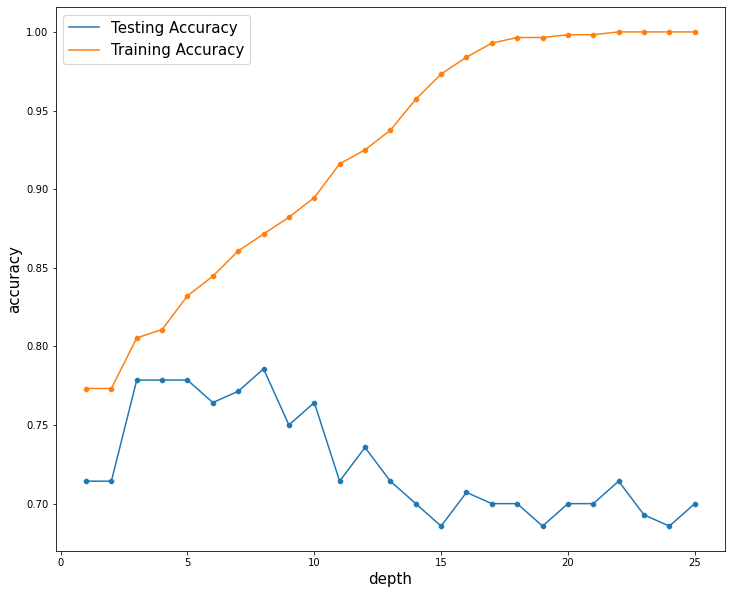

In [13]:
plt.figure(figsize = (12,10))
sns.lineplot(depth, testing_accuracies)
sns.scatterplot(depth, testing_accuracies)
sns.lineplot(depth, training_accuracies)
sns.scatterplot(depth, training_accuracies)
plt.legend(['Testing Accuracy', 'Training Accuracy'], fontsize=15)
plt.xlabel('depth', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.show()

1. Best Max Depth = 8, with accuracy 78.5 %
2. The deeper depth of the tree, the testing accuracy getting higher or method getting overfitting
3. Testing score have low accuracy score or method too underfitting
4. When the max depth 25, the accuracy in training set almost 100 %, while in test set the accuracy is very bad

Factor : 
- Decision trees tend to produce overfitting models
- When the depth is higher, the training set reaches 100 % accuracy while the test score is getting worse

Conclusion :
- Determination of the max depth should not be too low -> Underfitting
- Determination of the max depth should not be too high -> Overfitting

> ### Other 

In [14]:
# Using min_samples_leaf

depth = range(1, 26) # 1 3 5 7 .... 99
testing_accuracies = []
training_accuracies = []
score = 0

for i in depth:
    # Fitting Model
    tree = DecisionTreeClassifier(min_samples_leaf = i, criterion = 'entropy')
    tree.fit(x_train, y_train)
    
    # Test Accuracies
    y_pred_train = tree.predict(x_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracies.append(acc_train)
    
    # Train Accuracies
    y_pred_test = tree.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_test)
    
    # Choose best depth
    if score < acc_test:
        score = acc_test
        best_leaf= i

In [15]:
print('Best depth :', best_leaf)
print('Score :', score*100)

Best depth : 9
Score : 78.57142857142857


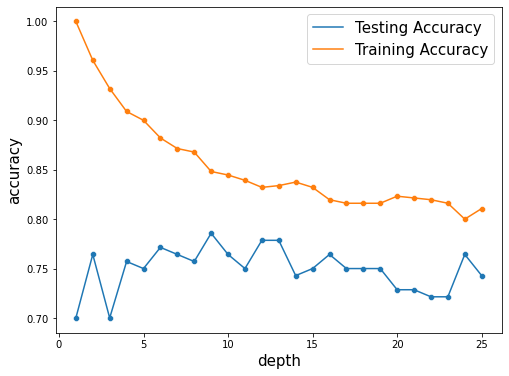

In [16]:
plt.figure(figsize = (8,6))
sns.lineplot(depth, testing_accuracies)
sns.scatterplot(depth, testing_accuracies)
sns.lineplot(depth, training_accuracies)
sns.scatterplot(depth, training_accuracies)
plt.legend(['Testing Accuracy', 'Training Accuracy'], fontsize=15)
plt.xlabel('depth', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.show()

________
## Model Complexity in Ridge
Data : boston dataset from sklearn
How :
- Apply Ridge Regression
    - target : target (house price)
    - features : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
- Using different alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001): Validate the model using mse in 80 % training data 20 % testing data
- Compare mse obtained from training data and testing data

> ### Data and Library

In [38]:
# Dataset
from sklearn.datasets import load_boston 

# Model
from sklearn.linear_model import Ridge, Lasso

# Metrics
from sklearn.metrics import mean_squared_error

In [18]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
df_boston = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df_boston['y'] = pd.Series(boston['target'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- y        price range (in thousand dollars)
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)<sup>2</sup> where Bk is the proportion of black people by town
- LSTAT    (%) lower status of the population
- MEDV     Median value of owner-occupied homes in \$1000's

> ### Data Splitting

In [25]:
x = df_boston.drop(columns = 'y')
y = df_boston['y']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1899)

> ### Scaling

In [28]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

> ### Ridge Regression

In [32]:
hyperparam_a = [100000, 10000, 10000, 100, 10, 1, 0.1, 0.01, 0.0001, 0.00001, 0.000001]
test_mse = []
train_mse = []
score = 1000

for i in hyperparam_a:
    # training model
    ridge = Ridge(alpha = i)
    ridge.fit(x_train_scaled, y_train)
    
    # score train
    y_pred_train = ridge.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)
    
    # score test
    y_pred_test = ridge.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test) 
    
    # best score
    if score > mse_test:
        score = mse_test
        best_alpha = i

In [33]:
print('best alpha :', best_alpha)
print('mse score :', score)

best alpha : 1
mse score : 27.6868788803617


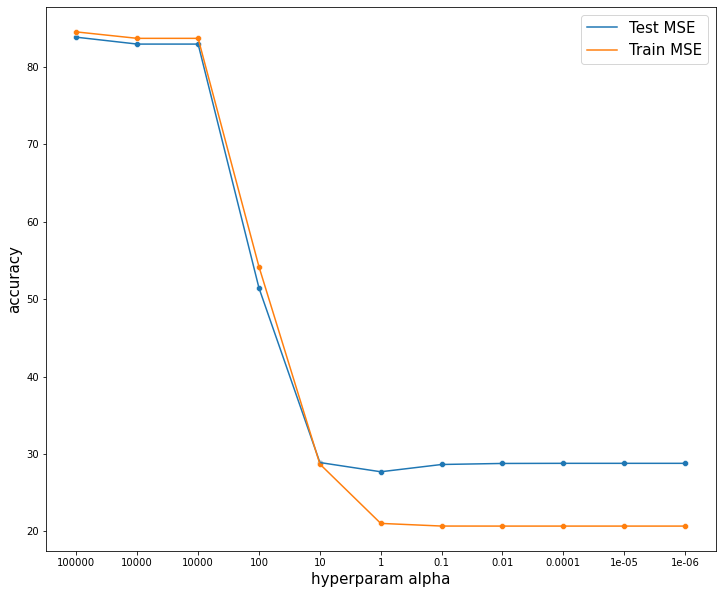

In [36]:
plt.figure(figsize = (12,10))
length =  range(len(hyperparam_a))
sns.lineplot(length, test_mse)
sns.scatterplot(length, test_mse)
sns.lineplot(length, train_mse)
sns.scatterplot(length, train_mse)
plt.legend(['Test MSE', 'Train MSE'], fontsize=15)
plt.xlabel('hyperparam alpha', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.xticks(length, hyperparam_a)
plt.show()

1. alpha > 1 (100000, 10000, 1000, 100, 10) : model underfitting, mse train or mse test value have great value
2. alpha downtrend, model generalization good
3. best alpha = 1
4. alpha < 1 (0.1, 0.001, 0.0001, 0.00001) : model overfitting, mse train have a good value but mse test have a bad value

In [37]:
pd.DataFrame({
    'alpha':hyperparam_a,
    'score_train': train_mse,
    'score_test': test_mse
})

,alpha,score_train,score_test
0,100000.000000,84.542598,83.858801
1,10000.000000,83.709846,82.969277
2,10000.000000,83.709846,82.969277
3,100.000000,54.172112,51.428245
4,10.000000,28.680369,28.878246
5,1.000000,21.012610,27.686879
6,0.100000,20.669433,28.627257
7,0.010000,20.664355,28.761537
8,0.000100,20.664301,28.776948
9,0.000010,20.664301,28.777089


1. too large alpha value : underfitting
2. too small alpha value : overfitting
3. optimal alpha value : 1 for this case and mse value : 27.688
4. sweet spot : may happen when train slightly better than test

________
## Model Complexity in Lasso
Data : boston dataset from sklearn
How :
- Apply Ridge Regression
    - target : target (house price)
    - features : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
- Using different alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001): Validate the model using mse in 80 % training data 20 % testing data
- Compare mse obtained from training data and testing data

> ### Lasso Regression

In [39]:
hyperparam_a = [100000, 10000, 10000, 100, 10, 1, 0.1, 0.01, 0.0001, 0.00001, 0.000001]
test_mse = []
train_mse = []
score = 1000

for i in hyperparam_a:
    # training model
    lasso = Lasso(alpha = i)
    lasso.fit(x_train_scaled, y_train)
    
    # score train
    y_pred_train = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)
    
    # score test
    y_pred_test = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test) 
    
    # best score
    if score > mse_test:
        score = mse_test
        best_alpha = i

In [40]:
print('best alpha :', best_alpha)
print('mse score :', score)

best alpha : 0.0001
mse score : 28.776327959979053


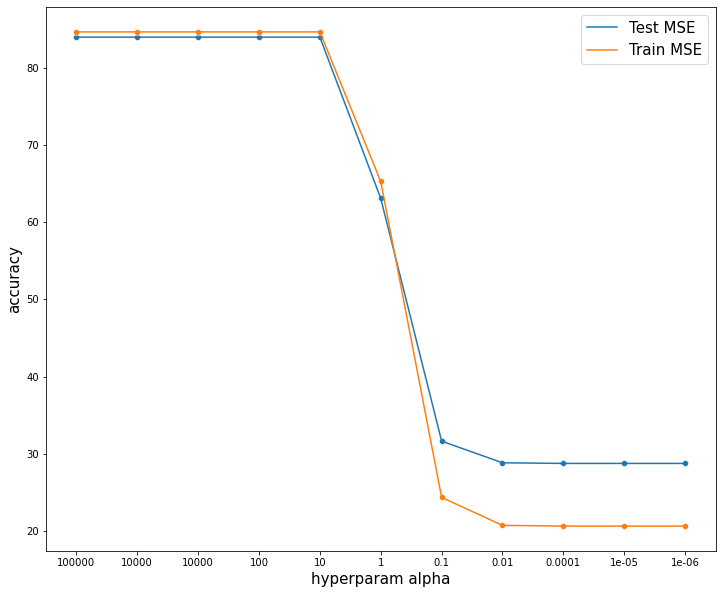

In [41]:
plt.figure(figsize = (12,10))
length =  range(len(hyperparam_a))
sns.lineplot(length, test_mse)
sns.scatterplot(length, test_mse)
sns.lineplot(length, train_mse)
sns.scatterplot(length, train_mse)
plt.legend(['Test MSE', 'Train MSE'], fontsize=15)
plt.xlabel('hyperparam alpha', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.xticks(length, hyperparam_a)
plt.show()

1. alpha > 0.0001 (100000, 10000, 1000, 100, 10, 1, 0.1, 0.001) : model underfitting, mse train or mse test value have great value
2. alpha downtrend, model generalization good
3. best alpha = 0.0001, mse = 28.7763
4. alpha < 0.0001 (0.00001) : model overfitting, mse train have a good value but mse test have a bad value

In [42]:
pd.DataFrame({
    'alpha':hyperparam_a,
    'score_train': train_mse,
    'score_test': test_mse
})

,alpha,score_train,score_test
0,100000.000000,84.637191,83.959835
1,10000.000000,84.637191,83.959835
2,10000.000000,84.637191,83.959835
3,100.000000,84.637191,83.959835
4,10.000000,84.637191,83.959835
5,1.000000,65.273673,63.081291
6,0.100000,24.374053,31.660629
7,0.010000,20.759526,28.859161
8,0.000100,20.664313,28.776328
9,0.000010,20.664301,28.777025
